# Huffman Coding and Graphing Its Tree
---
An exhaustive web search of test cases are listed in the cell below.

In [1]:
#https://cs.nyu.edu/courses/fall10/V22.0102-004/lectures/Huffman.pdf
# sym=['a','b','c','d','e','f','g']
# prb=[37, 18, 29, 13, 30, 17, 6]

#https://www.includehelp.com/algorithms/huffman-coding-algorithm-example-and-time-complexity.aspx
sym=['m1','m2','m3','m4','m5','m6', 'm7']
prb=[4, 5, 7, 8, 10, 12, 20]

#https://www.geeksforgeeks.org/huffman-coding-greedy-algo-3/
# sym=['a','b','c','d','e','f']
# prb=[5, 9, 12, 13, 16, 45]

#https://www.thecrazyprogrammer.com/2014/09/huffman-coding-algorithm-with-example.html
# sym=['a','b','c','d','e','f']
# prb=[5, 25, 7, 15, 4, 12]

The data is formatted to two lists:
* '**sym**' is the list of symbols.  Each symbol should be of type *str*.
* '**prb**' is the list of corresponding probability or frequency of type *int* or *float*.

---

## I.  Generate Huffman Code
The function '**huff_code**' generates a dictionary '**code_dict**' of symbols and their codes.  '**sym_nest**' is the output of function '**group**' and it is used in the function '**bits**'.  Later, both outputs are utilized to generate additional information for graphing. 

In [2]:
def huff_code(symb, prob):
    '''
    Makes copies of the lists 'symb' and 'prob' then calls the function
    'group' to generate a nested list of lists of symbols representing 
    the huffman code tree structure.  A dictionary 'code_dict' of symbols 
    and binary code is created with the function 'bits'.  
    '''
    
    #------------------------------------------------------------------
    def group(symb, prob):
        '''
        Taking a list of symols('symb') and a corresponding list of 
        probabilities('prob'), the two least probable symbols are first 
        grouped into a list and added to 'symb' as a new "symbol".  
        Their individual probabilities are deleted while their combined 
        or summed probabilities are added to 'prob'.  This function is 
        iteratively called until 'symb' only contains two items.
        '''
        if len(symb)==2:
            return 
        else:
            new_p=0
            min_sym_lst=[]
            for i in range(2):
                min_p = min(prob)
                index = prob.index(min_p)
                min_s = symb[index]
                new_p = new_p + min_p
                min_sym_lst.append(min_s)
                prob.remove(prob[index])
                symb.remove(symb[index])                  
            prob.append(new_p)
            symb.append(min_sym_lst)      
            group(symb, prob)
    #------------------------------------------------------------------ 
    
    #------------------------------------------------------------------         
    def bits(symb, bitstr=''):
        '''
        After the operation on the original 'symb' by the function 'group', 
        'symb' contains a list where each list contains two items.  
        Exploiting this fact, bit '0' or '1' is appended based on the 
        object's index within the operated list.  This function is 
        recursively called when each item is found in the list is a list.  
        The termination condition is met when the item found in the list is 
        a str.  
        '''
        for i in range(2):
            if type(symb[i]) == str:
                code_dict[symb[i]] = bitstr + str(i)
            else:
                bits(symb[i], bitstr + str(i))
        return
    #------------------------------------------------------------------

    #make copies of lists 'sym and 'prb'    
    sym_nest=symb.copy()
    prb_cpy=prob.copy()
    
    #modify sym_cpy to a list of lists containing symbols and or lists 
    group(sym_nest,prb_cpy)
    
    #global dict of key(symbol) and value(code)
    code_dict={}
    
    #populate code_dict with key(symbol) and value(1's and 0's) 
    bits(sym_nest)
    
    return sym_nest, code_dict

The above function is called for the selected test case.  
The dictionary of the resulting code is printed.

In [3]:
sym_nest, code_dict = huff_code(sym,prb)
print('Huffman Code Dictionary')
print('-----------------------\n')
print(code_dict)

Huffman Code Dictionary
-----------------------

{'m7': '11', 'm2': '1001', 'm3': '010', 'm5': '101', 'm1': '1000', 'm4': '011', 'm6': '00'}


***Done!*** Unless visuals are interesting.  

---

## II. Requirements to Graph the Huffman Code Tree
*NetworkX* is chosen as the package to plot the tree structure because all other available packages seem just as difficult to use.  
  In order to produce such a graph, the following informations are required:  
1.  Dictionary of nodes and children
2.  Edge labels of '1' or '0'
3.  Node labels of either node/symbol names or their corresponding probabilities
4.  Positions of each node/symbol

### 1.  Dictionary of Nodes and Their Children
To generate a dictionary of nodes and their children, the list '**sym_nest**' is utilized.  
This list is shown in the output below.

In [4]:
print('Nested List of Lists and Symbols')
print('--------------------------------\n')
print(sym_nest)

Nested List of Lists and Symbols
--------------------------------

[['m6', ['m3', 'm4']], [[['m1', 'm2'], 'm5'], 'm7']]


'**sym_nest**' is passed into function '**node_child_gen**' to generates the dictionary of nodes and their children called '**node_child_dict**'.  This dictionary is required by *NetworkX* to define the connections of the graph. 

In [5]:
def node_child_gen(symb, node_label):
    '''
    Just a wrapper for the function 'node_child' since it is recursive and
    operates on an external dictionary 'node_child_dict'.
    '''   
    
    #------------------------------------------------------------------ 
    def node_child(symb, node_index = 0):
        '''
        Build a dictionary of nodes and their immediate two children.
        The list 'symb' is a nested list of lists of symbols generated
        by the function 'group'.  When a list is encountered, a node name
        is created and added to the list 'kid'.  After both children are
        found, the node and its children are added to 'node_child_dict'. 
        'node_child' is called recursively until a symbol of type str is 
        encountered.
        '''
        n =  node_index
        current_node_index = n
        kid = []
        for i in range(2):
            if type(symb[i]) == str:
                kid.append(symb[i])
            else:
                node = node_label+str(n+1)
                n = n+1
                node_child_dict[node] = ''
                kid.append(node)
                n = node_child(symb[i],n)
        node_child_dict[node_label+str(current_node_index)] = kid
        return n 
    #------------------------------------------------------------------ 
    
    #create a dictionary with the root node and unknown children
    node_child_dict={node_label+'0':''} 
    
    #call the function 'node_child' to populate node_child_dict
    node_child(symb)
    
    return node_child_dict

The above function is called.  
The resulting dictionary is printed.

In [6]:
node_child_dict = node_child_gen(sym_nest, 'N')
print('Dictionary of Nodes and Their Children')
print('--------------------------------------\n')
print(node_child_dict)

Dictionary of Nodes and Their Children
--------------------------------------

{'N2': ['m3', 'm4'], 'N1': ['m6', 'N2'], 'N5': ['m1', 'm2'], 'N3': ['N4', 'm7'], 'N0': ['N1', 'N3'], 'N4': ['N5', 'm5']}


### 2.  Edge Labels
Both '**sym_nest**' and '**code_dict**' are passed into function '**edge_labels**' to generate two dictionaries:  
1.  '**e_labels_dict**', a dictionary of edges(tuple of 2 nodes) and their labels.  This is the format required by *NetworkX*.
2.  '**node_path_dict**', a dictionary of symbols and lists of their paths.  This will be used later for node positioning purposes.

In [7]:
def edge_labels(node_label, symb, code_dict): 
    '''
    Mostly a wrapper for the function 'path' since it is recursive and
    operates on an external dictionary 'node_path_dict'.  Once 'patho' had
    been executed, a dictionary of (nodeX, nodeY) and 'x' where x is either
    '1' or '0' is generated.  This is the edge label format required by NetworkX
    '''  
    
    #------------------------------------------------------------------ 
    def patho(symb, node_path = [node_label+'0'], node_index = 0):
        '''
        Build a dictionary of symbols and a list of nodes from the root
        node to the symbol.  This uses similiar strategies as in 'node_child'.
        '''
        n =  node_index
        current_node_path = node_path.copy()
        for i in range(2):
            if type(symb[i]) == str:
                node_path_dict[symb[i]] = current_node_path
            else:
                node = node_label+str(n+1)
                n = n+1
                current_node_path.append(node)
                n = patho(symb[i], current_node_path, n)
                current_node_path.pop()
        return n  
    #------------------------------------------------------------------ 
    
    #initialize an empty dictionary for function 'patho' and call function
    node_path_dict={}
    patho(symb)

    e_labels_dict={}
    #Populate 'e_labels_dict' with edges((nodeA,nodeB)) and the binary digit assosciated with that edge. 
    for key in node_path_dict.keys():
        temp_list = node_path_dict[key]
        if len(temp_list) > 1:
            for i in range(len(temp_list)-1):
                e_labels_dict[(temp_list[i], temp_list[i+1])] = code_dict[key][i]
            e_labels_dict[(temp_list[i+1], key)] = code_dict[key][i+1]
        else:
            e_labels_dict[(temp_list[0], key)] = code_dict[key][0]
            
    return e_labels_dict, node_path_dict

The above function is called.  
The resulting dictionaries are printed.

In [8]:
e_labels_dict, node_path_dict = edge_labels('N', sym_nest, code_dict)
print('Edge Labels of the Graph')
print('------------------------\n')
print(e_labels_dict)
print('\n\n')
print('Dictionary of Symbols and Their Paths')
print('-------------------------------------\n')
print(node_path_dict)

Edge Labels of the Graph
------------------------

{('N2', 'm3'): '0', ('N0', 'N3'): '1', ('N4', 'N5'): '0', ('N3', 'N4'): '0', ('N2', 'm4'): '1', ('N1', 'N2'): '1', ('N0', 'N1'): '0', ('N5', 'm1'): '0', ('N5', 'm2'): '1', ('N4', 'm5'): '1', ('N3', 'm7'): '1', ('N1', 'm6'): '0'}



Dictionary of Symbols and Their Paths
-------------------------------------

{'m7': ['N0', 'N3'], 'm2': ['N0', 'N3', 'N4', 'N5'], 'm3': ['N0', 'N1', 'N2'], 'm5': ['N0', 'N3', 'N4'], 'm1': ['N0', 'N3', 'N4', 'N5'], 'm4': ['N0', 'N1', 'N2'], 'm6': ['N0', 'N1']}


### 3.  Node Labels
Once the dictionary '**node_child_dict**' is populated, which it should already be, the '.draw()' and '.Graph()' methods of *NetworkX* will use the node and symbol names as labels.  However, if the probabilities or frequencies are desired as labels, a new label dictionary of node/symbol and probability/frequency needs to be created.

In [9]:
def node_symb_prob_dict(sym, prb, node_child_dict): 
    '''
    Creates a dictionary of symbols and probabilities from the list of symbols 
    and probablities 'sym_prb_dict'.  Then based on the information in 
    'node_child_dict', a dictionary of nodes and their children, the nodes and 
    their cumulative probabilities are added into 'sym_prb_dict'.  
    '''
    sym_prb_dict = dict(zip(sym,prb))
    node_child_dict_cp=node_child_dict.copy()
    
    # At first, 'sym_prb_dict' contains only childrens of nodes.  Once the nodes
    # with children of symbols only are found in 'node_child_dict_cp', the nodes 
    # are added into 'sym_prb_dict' and removed from 'node_child_dict_cp'.     
    while len(node_child_dict_cp)!=0:
        for key in node_child_dict_cp.keys():
            key_del_list=[]
            child = node_child_dict_cp[key]
            if child[0] in sym_prb_dict.keys() and child[1] in sym_prb_dict.keys():
                sym_prb_dict[key]= sym_prb_dict[child[0]]+ sym_prb_dict[child[1]]
                key_del_list.append(key)
        for key in key_del_list:
            node_child_dict_cp.pop(key)
    return sym_prb_dict 

In [10]:
spd_cpy = node_symb_prob_dict(sym, prb, node_child_dict)
print('Node Labels in Probability or Frequency')
print('---------------------------------------\n')
print(spd_cpy)

Node Labels in Probability or Frequency
---------------------------------------

{'N1': 27, 'm7': 20, 'N5': 9, 'N3': 39, 'm3': 7, 'm5': 10, 'N4': 19, 'm4': 8, 'N2': 15, 'm2': 5, 'N0': 66, 'm1': 4, 'm6': 12}


### 4.  Node Positions
The number of levels or the depth of the graph is derived with the function '**level_dict**' using the information provided by '**node_path_dict**'. The number of levels is used to figure out the y axis increment of the graph.  The positions of each node and symbol is then generated by the function '**node_posi**' with the y axis increment and '**node_child_dict**' information.  <u>The information in '**level_dict**' is currently not fully utilized to better position the nodes and symbols in the x axis</u>.     

In [11]:
import numpy as np

In [12]:
def level_dict(node_path_dict):
    '''
    From 'node_path_dict', a dictionary of levels and nodes/symbols of the 
    corresponding levels is created.  The number of levels and the amount of
    nodes/symbols of each level could be used to position the nodes/symbols for
    clearer display of the graph.  
    '''
    level_dict={}
    for key in node_path_dict.keys():
        temp_list = node_path_dict[key]
        for i in range(len(temp_list)):
            if i not in level_dict.keys():
                level_dict[i] = []
            if node_path_dict[key][i] not in level_dict[i]:
                level_dict[i].append(node_path_dict[key][i])
        if (i+1) not in level_dict.keys():
            level_dict[i+1] = []
        level_dict[i+1].append(key)
    return level_dict

In [13]:
def node_posi(node_label, y_off, node_child_dict):
    '''
    Calls the function 'posi_place' recursively starting from the root node. 
    The termination condition is when a symbol is placed.  NetworkX has a grid
    from -1 to 1 in both the x and y directions.  The position of the root node
    is at 0,1.  The dictionary 'posi' will be returned and conforms to the 
    format of NetworkX.
    '''
    def posi_place(key, width=1):
        child0 = node_child_dict[key][0]       
        child0_x = posi[key][0] - width/2
        child0_y = posi[key][1] - y_off
        posi[child0] = np.array([child0_x, child0_y])
        if child0 in node_child_dict.keys():
            posi_place(child0,width/2)
            
        child1 = node_child_dict[key][1]        
        child1_x = posi[key][0] + width/2
        child1_y = posi[key][1] - y_off
        posi[child1] = np.array([child1_x, child1_y])
        if child1 in node_child_dict.keys():
            posi_place(child1,width/2)
    
    root_node = node_label+'0'
    posi = {root_node : np.array([0,1])}    
    posi_place(root_node)
    
    return posi

The above functions are called.  
The resulting dictionaries are printed.

In [14]:
level_dict = level_dict(node_path_dict)

#y-offset.  Since the total height of the graph is 2, the y-axis increment is 2/levels 
y_off = 2/len(level_dict)

posi = node_posi('N', y_off, node_child_dict)

print('Levels of the Graph and Node/Symbols in the Level')
print('-------------------------------------------------\n')
print(level_dict)
print('\n\n')
print('The positions of Nodes and Symbols')
print('----------------------------------\n')
print(posi)

Levels of the Graph and Node/Symbols in the Level
-------------------------------------------------

{0: ['N0'], 1: ['N3', 'N1'], 2: ['m7', 'N4', 'N2', 'm6'], 3: ['N5', 'm3', 'm5', 'm4'], 4: ['m2', 'm1']}



The positions of Nodes and Symbols
----------------------------------

{'N1': array([-0.5,  0.6]), 'm7': array([0.75, 0.2 ]), 'N4': array([0.25, 0.2 ]), 'N3': array([0.5, 0.6]), 'm3': array([-0.375, -0.2  ]), 'm5': array([ 0.375, -0.2  ]), 'N5': array([ 0.125, -0.2  ]), 'm4': array([-0.125, -0.2  ]), 'N2': array([-0.25,  0.2 ]), 'm2': array([ 0.1875, -0.6   ]), 'N0': array([0, 1]), 'm1': array([ 0.0625, -0.6   ]), 'm6': array([-0.75,  0.2 ])}


---

## III.  Graph

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from ipywidgets import interact

In [16]:
def huff_graph(labels):
    if labels[0]=='N':
        node=True
    else:
        node=False
    plt.clf()
    G=nx.Graph(node_child_dict)
    pos = posi
    nx.draw(G, pos = pos, with_labels = node)
    nx.draw_networkx_edge_labels(G,pos,edge_labels = e_labels_dict,font_color='blue')
    if node==False:
        nx.draw_networkx_labels(G,pos = posi, labels = spd_cpy)
    plt.show()


C:\Users\Frank\AppData\Local\Enthought\Canopy\edm\envs\Frank_Python\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


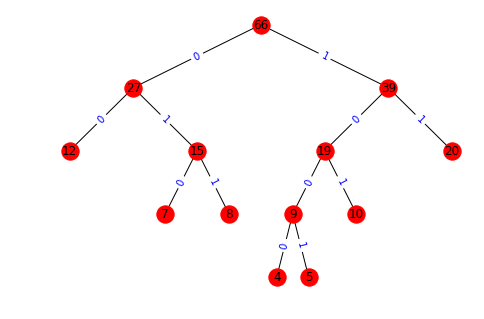

In [19]:
#interact(huff_graph, labels=['Nodes/Symbols', 'Probabilities/Frequencies']);
huff_graph('P')